## Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
- Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

#### Insights to be drawn -
- Get all the cars and their types that do not qualify for clean alternative fuel vehicle
- Get all TESLA cars with the model year, and model type made in Bothell City.
- Get all the cars that have an electric range of more than 100, and were made after
2015
- Draw plots to show the distribution between city and electric vehicle type

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("dataset/Electric_Vehicle_Population_Data (1).csv")

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

## Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [7]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [8]:
# all the cars and type eligible for clean alternative fuel vehicle
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == "Clean Alternative Fuel Vehicle Eligible"][["Model","Electric Vehicle Type"]]

,Model,Electric Vehicle Type
0,MODEL X,Battery Electric Vehicle (BEV)
1,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV)
2,MODEL 3,Battery Electric Vehicle (BEV)
3,LEAF,Battery Electric Vehicle (BEV)
4,MODEL S,Battery Electric Vehicle (BEV)
...,...,...
130428,LEAF,Battery Electric Vehicle (BEV)
130429,X5,Plug-in Hybrid Electric Vehicle (PHEV)
130432,MODEL Y,Battery Electric Vehicle (BEV)
130436,MODEL 3,Battery Electric Vehicle (BEV)


## Get all TESLA cars with the model year, and model type made in Bothell City.

In [9]:
df[df['City'] =='Bothell'][['Model','Model Year']]

,Model,Model Year
36,SORENTO,2022
39,MODEL 3,2020
56,LEAF,2017
217,MODEL 3,2022
218,MODEL Y,2022
...,...,...
130001,ESCAPE,2022
130074,NIRO,2022
130177,PACIFICA,2018
130295,MODEL 3,2022


## Get all the cars that have an electric range of more than 100, and were made after 2015

In [10]:
df.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10


In [11]:
df[(df['Electric Range'] > 100) & (df['Model Year'] >2015)]["Model"]

0         MODEL X
2         MODEL 3
4         MODEL S
12        MODEL 3
13        MODEL 3
           ...   
130417    MODEL Y
130428       LEAF
130432    MODEL Y
130436    MODEL 3
130441    MODEL X
Name: Model, Length: 34066, dtype: object

## Draw plots to show the distribution between city and electric vehicle type

In [58]:
df['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [59]:
grouped_data =  df.groupby(['City']).size().reset_index(name='Count').sort_values(by='Count',ascending=False).head(20)


In [60]:
grouped_data_type =  df.groupby(['City','Electric Vehicle Type']).size().reset_index(name='Count')

In [61]:
pivot_df = grouped_data_type.pivot(index='City', columns='Electric Vehicle Type', values='Count')

In [62]:
combined_df = pd.merge(grouped_data,pivot_df,on="City")

In [63]:
combined_df.drop(columns='Count',inplace=True, axis=1)
combined_df

,City,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
0,Seattle,17851.0,5043.0
1,Bellevue,5729.0,1019.0
2,Redmond,4112.0,708.0
3,Vancouver,3287.0,1365.0
4,Kirkland,3388.0,683.0
5,Bothell,3396.0,628.0
6,Sammamish,3285.0,534.0
7,Renton,2561.0,750.0
8,Olympia,2234.0,906.0
9,Tacoma,1991.0,761.0


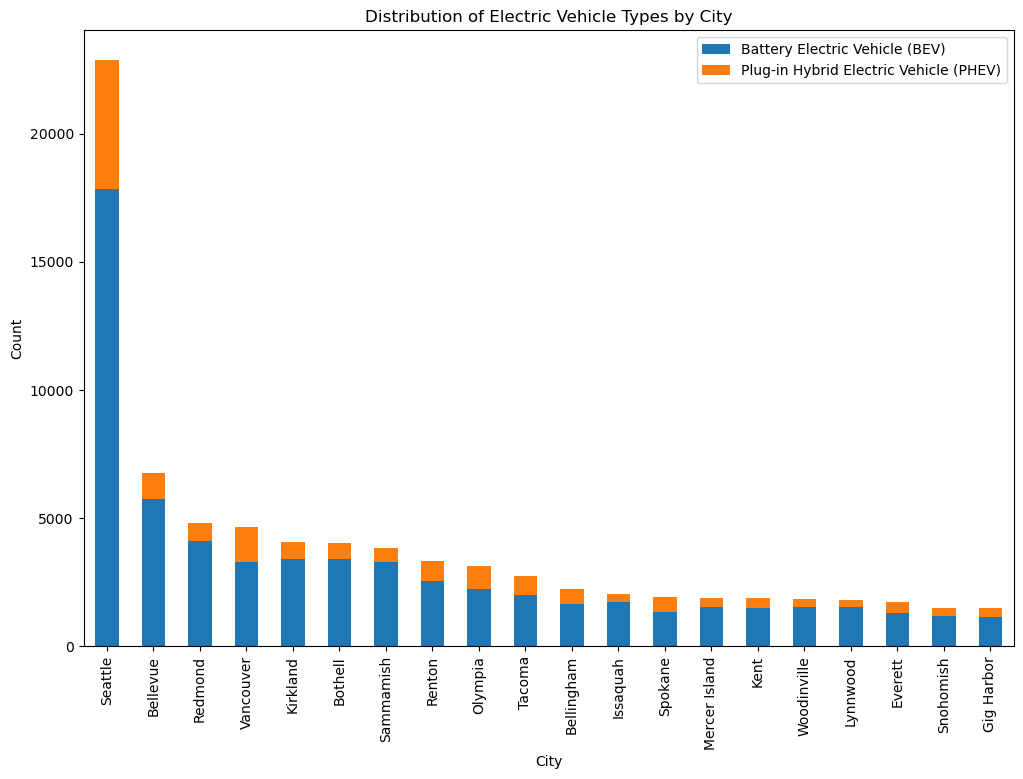

In [64]:
combined_df.set_index('City', inplace=True)
ax = combined_df.plot(kind='bar', stacked=True, figsize=(12, 8))

ax.set_xlabel('City')
ax.set_ylabel('Count')

ax.set_title('Distribution of Electric Vehicle Types by City')


ax.legend()
plt.show()





